In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [3]:
from sklearn.metrics import silhouette_score, confusion_matrix

In [ ]:
# Importing data
df = pd.read_csv('Live.csv')

KMeans cluster labels can differ from ground truth labels even if clustering is perfect, the "accuracy" here depends on how the clusters align with the true labels. So, looking at the accuracy scores, since they're extremely it would suggest that there is an issue with the labels. Which we'll need to address.

Pleas also note that Kmeans might generate more extra clusters. In this case the model might be providing valuable insights! By splitting "photo" or "video" into multiple clusters, KMeans could be uncovering meaningful subgroups within your data.

# EDA

In [7]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
df.shape

(7050, 16)

In [7]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


OBSERVATIONS : We can also see that there's a huge gap in the min and max values. These differences can be very extreme. Which in return can really throw off the performance of our model.

In [8]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [9]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

NoneType

Unique status types total:  4


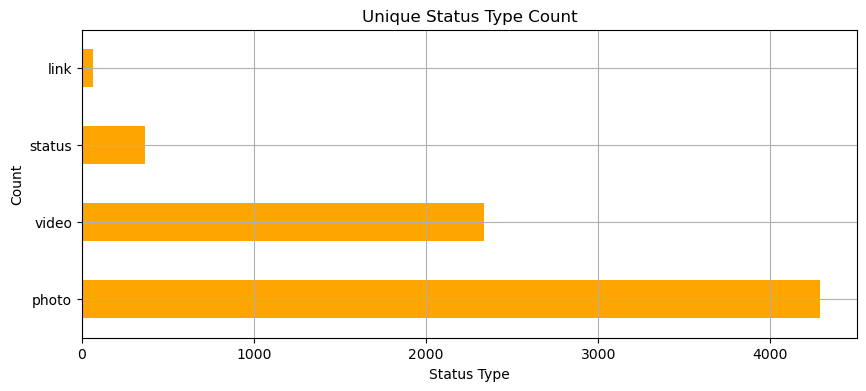

In [10]:
# Status types

print("Unique status types total: ",df['status_type'].nunique())

df['status_type'].value_counts().plot(kind='barh',figsize=(10,4),color='orange',grid=True)
plt.title('Unique Status Type Count')
plt.ylabel("Count",fontsize=10)
plt.xlabel("Status Type",fontsize=10)
plt.show()

In [11]:
df['status_published'].nunique()

6913

In [12]:
print("No of Vale counts for Status Type column")
df['status_type'].value_counts()

No of Vale counts for Status Type column


status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

# Cleaning Data

In [14]:
# Let's drop the 4 columns as they addd no value
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [15]:
# These columns are also unnecessary to our dataset.
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

KeyError: "['status_id', 'status_published'] not found in axis"

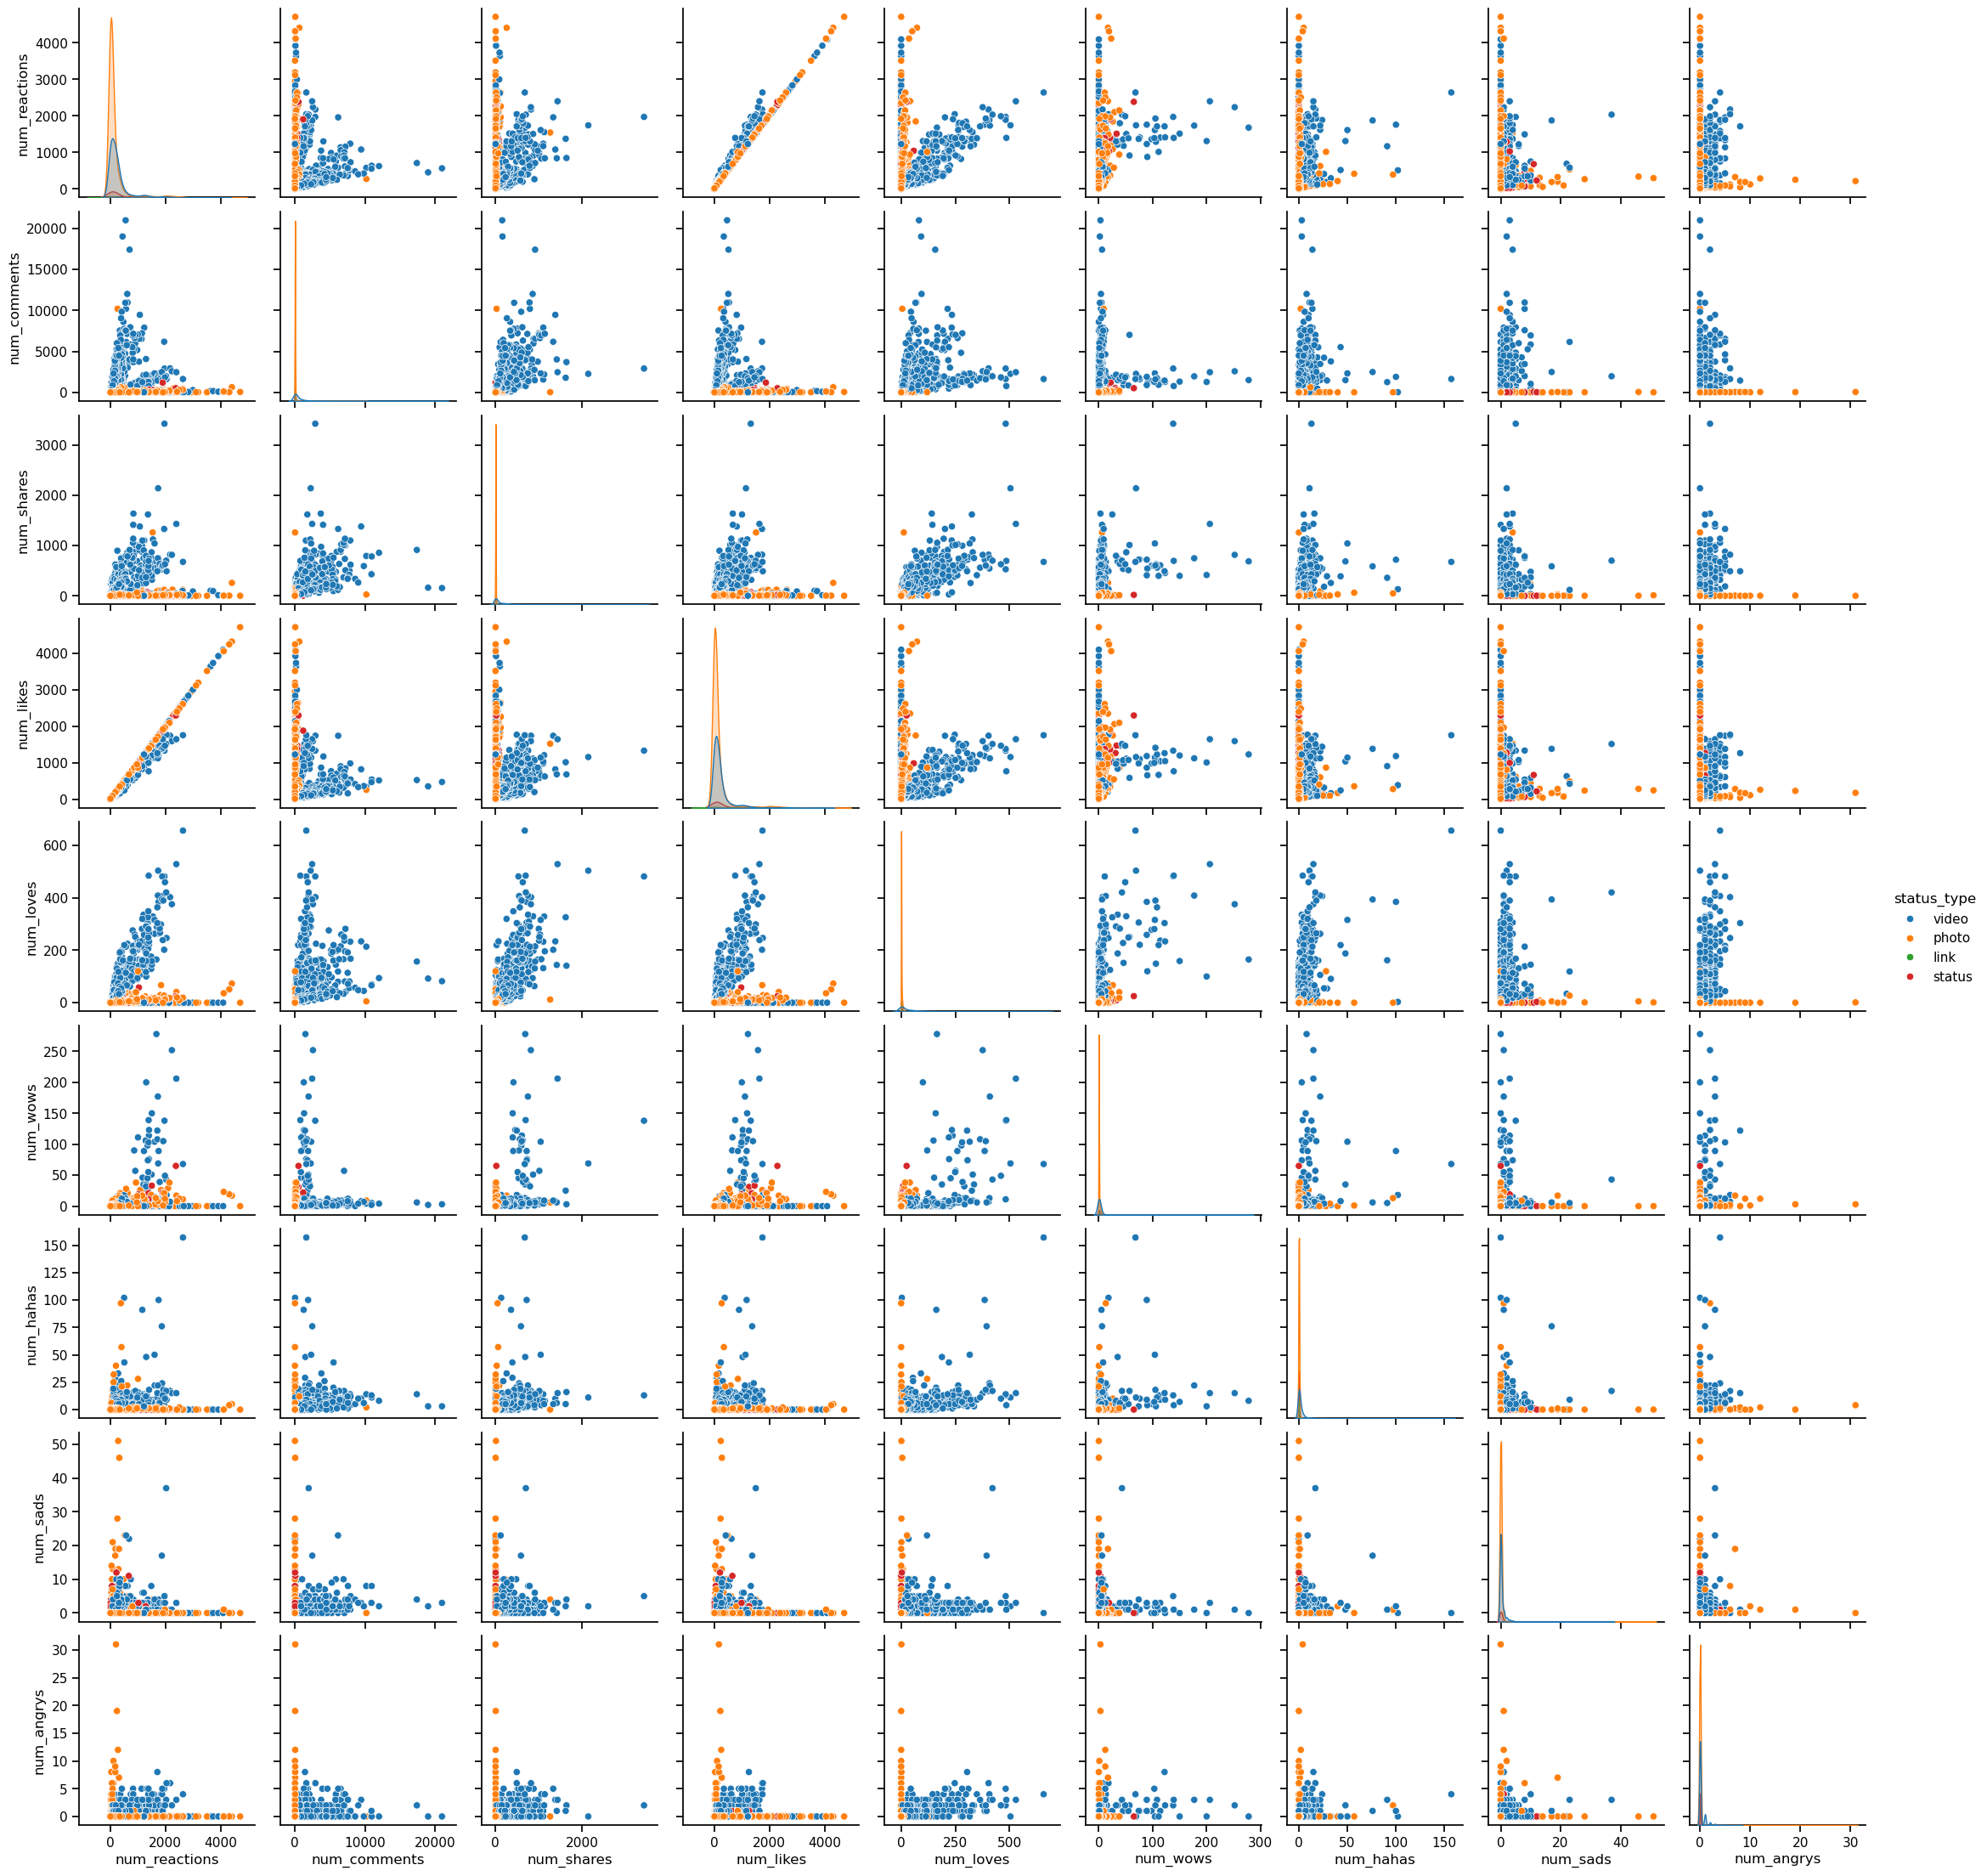

In [15]:
# Let's see the pairplot of the each variables relationshiop
sns.set_context('notebook')
sns.color_palette("viridis", as_cmap=True)
#sns.set_style('white')
sns.pairplot(df,hue='status_type');

# Influence on Status type

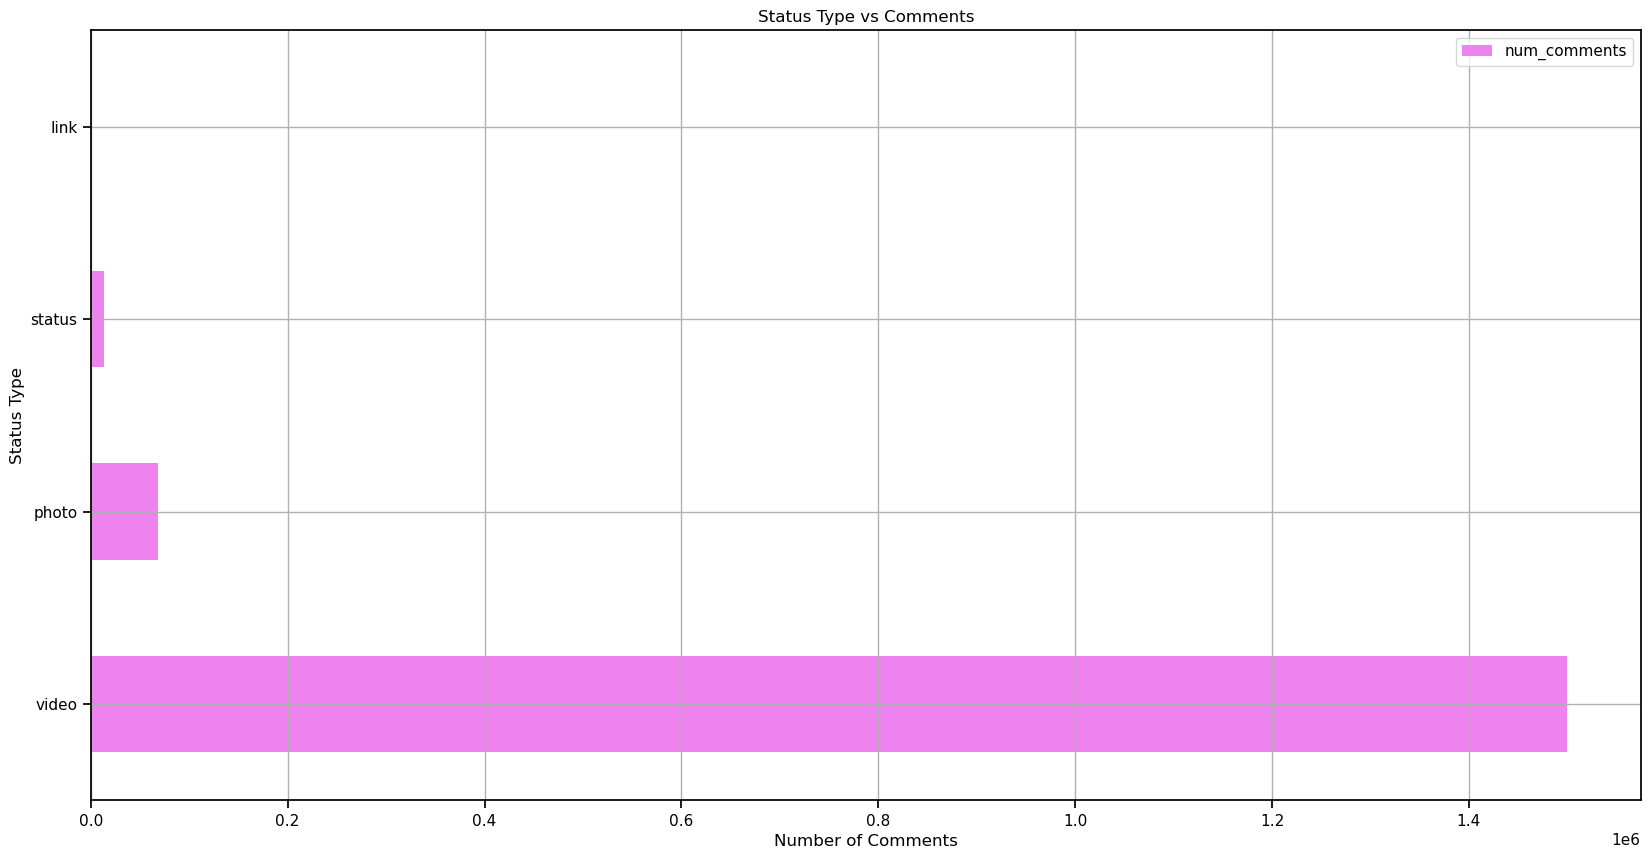

In [16]:
plt.figure(figsize=(20,10))

df.groupby('status_type')['num_comments'].sum().sort_values(ascending = False).plot(kind='barh', color='violet', grid=True)
plt.title("Status Type vs Comments")
plt.xlabel('Number of Comments')
plt.ylabel('Status Type')
plt.legend(loc='upper right')

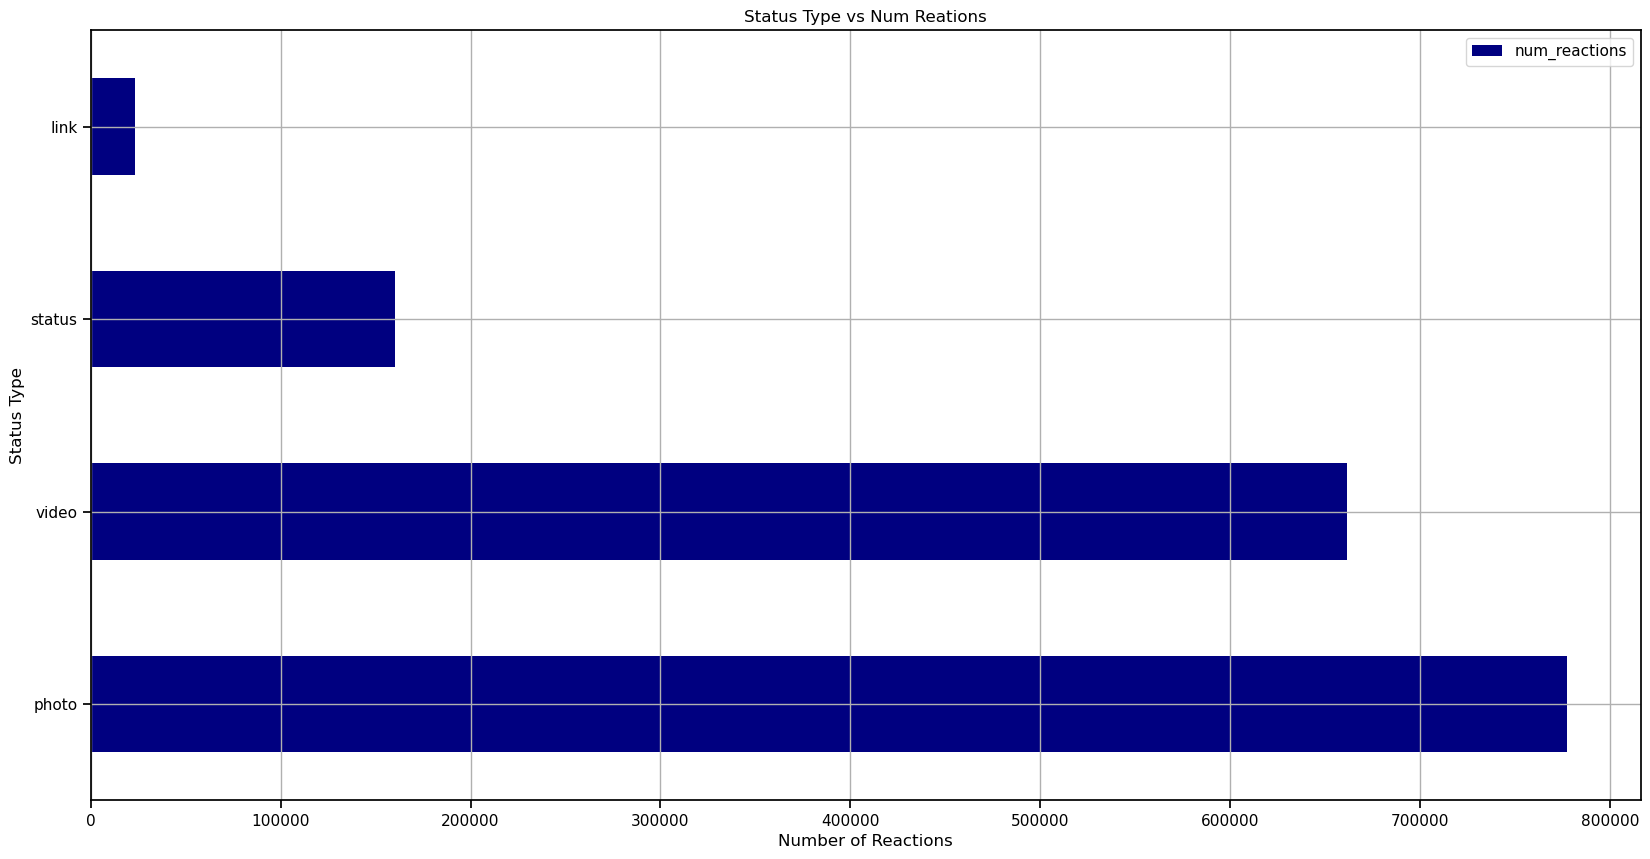

In [17]:
plt.figure(figsize=(20,10))

df.groupby('status_type')['num_reactions'].sum().sort_values(ascending = False).plot(kind='barh',color='navy', grid=True)
plt.title("Status Type vs Num Reations")
plt.xlabel('Number of Reactions')
plt.ylabel('Status Type')
plt.legend(loc='upper right')

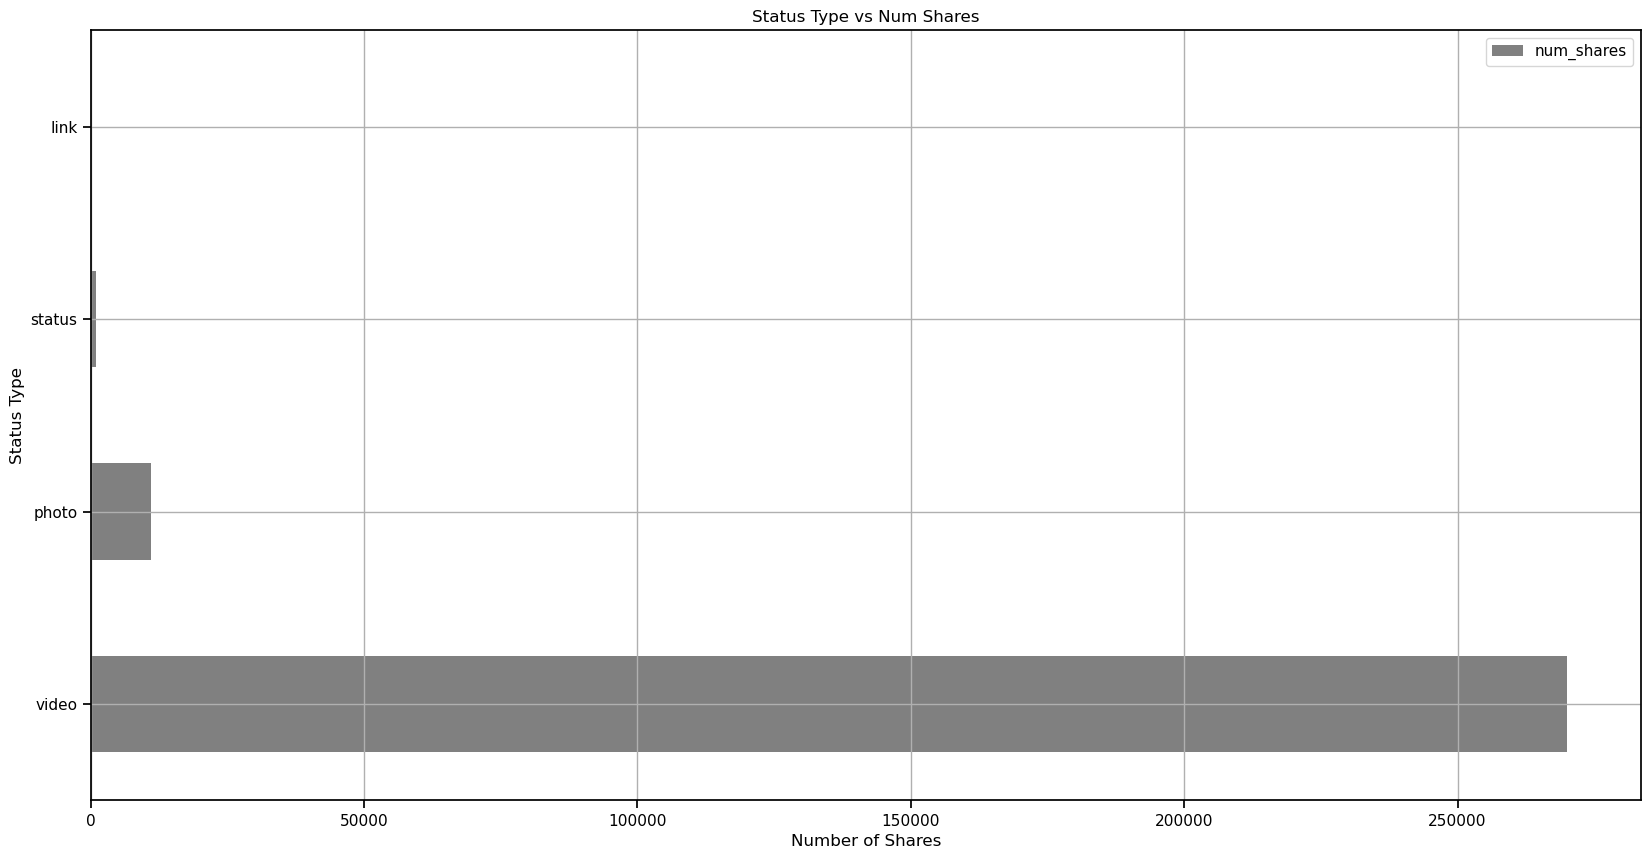

In [18]:
plt.figure(figsize=(20,10))

df.groupby('status_type')['num_shares'].sum().sort_values(ascending = False).plot(kind='barh',color='grey', grid=True)
plt.title("Status Type vs Num Shares")
plt.xlabel('Number of Shares')
plt.ylabel('Status Type')
plt.legend(loc='upper right')

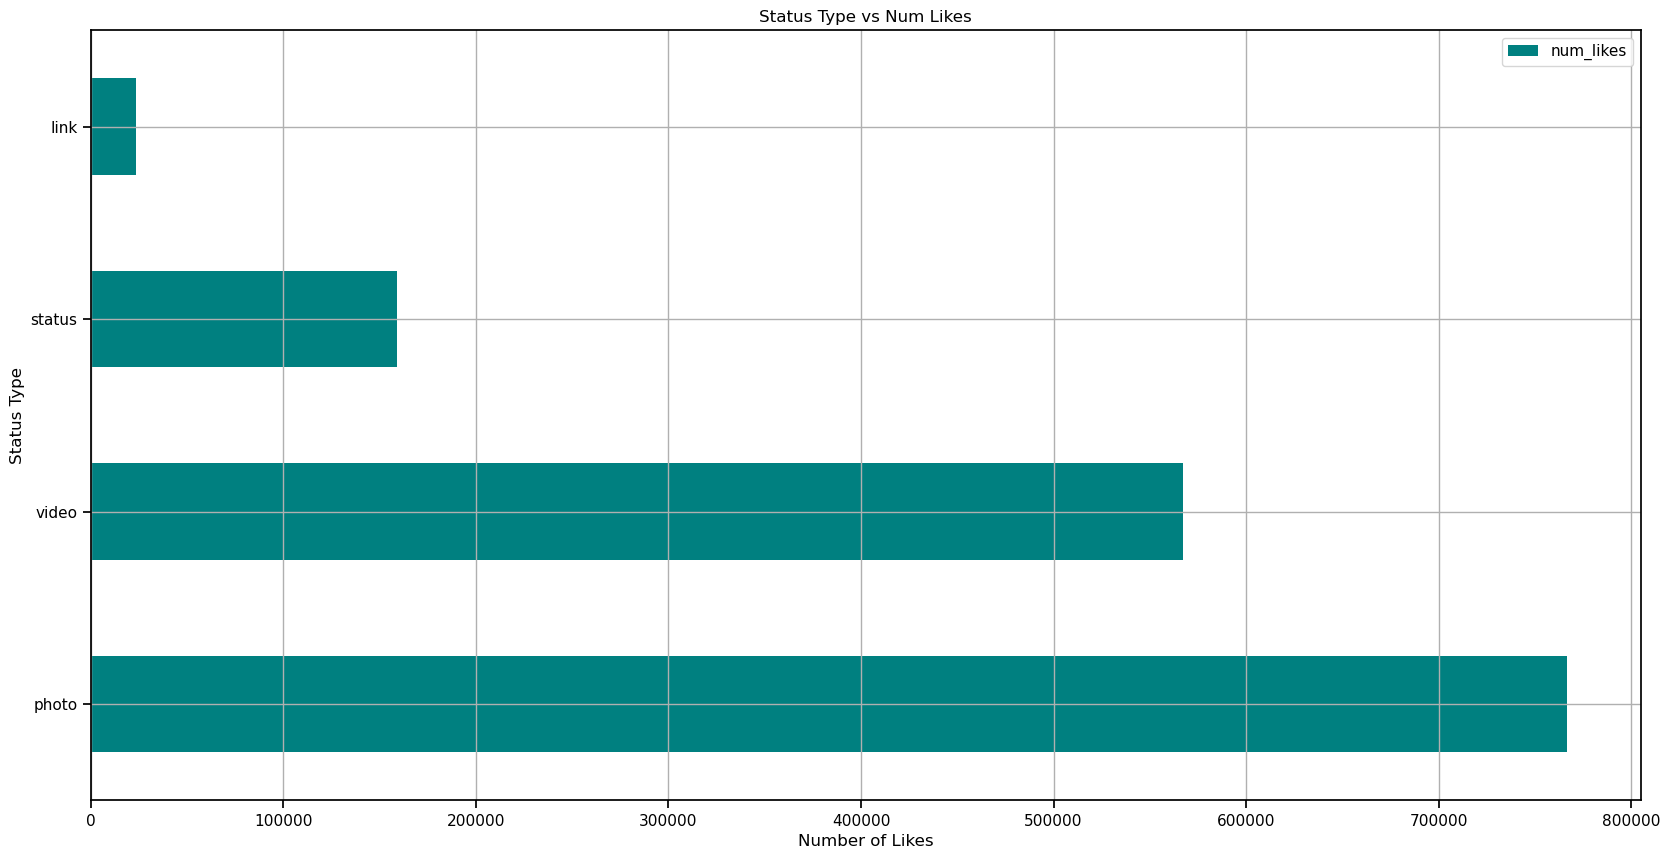

In [19]:
plt.figure(figsize=(20,10))

df.groupby('status_type')['num_likes'].sum().sort_values(ascending = False).plot(kind='barh',color='teal', grid=True)
plt.title("Status Type vs Num Likes")
plt.xlabel('Number of Likes')
plt.ylabel('Status Type')
plt.legend(loc='upper right')

OBSERVATIONS : It's clear that content engament is higher where videos and photos are presen (As more comments and likes are often for videos and photos.)

# Data preperation for Model

### Splitting the Data

In [20]:
x = df.drop('status_type',axis=1)   # Features
y = df['status_type']   # Target

In [21]:
x.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


In [22]:
y.head()

0    video
1    photo
2    video
3    photo
4    photo
Name: status_type, dtype: object

### Encoding

In [23]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [24]:
y

array([3, 1, 3, ..., 1, 1, 1])

In [25]:
pd.DataFrame(y).value_counts()

0
1    4288
3    2334
2     365
0      63
Name: count, dtype: int64

### Data scaling - Features

In [26]:
mms = MinMaxScaler()
x_scaled = mms.fit_transform(x)

In [27]:
x_scaled

array([[0.11231423, 0.02439257, 0.07651869, ..., 0.00636943, 0.01960784,
        0.        ],
       [0.03184713, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04819533, 0.01124345, 0.0166472 , ..., 0.00636943, 0.        ,
        0.        ],
       ...,
       [0.00042463, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07452229, 0.0005717 , 0.00642523, ..., 0.        , 0.        ,
        0.        ],
       [0.00360934, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
pd.DataFrame(x_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.048857,0.010689,0.011689,0.045657,0.019374,0.004638,0.004436,0.004778,0.003651
std,0.098222,0.042384,0.038435,0.095429,0.060842,0.031366,0.025205,0.031317,0.023446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003609,0.000000,0.000000,0.003609,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012633,0.000191,0.000000,0.012314,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.046497,0.001096,0.001168,0.039225,0.004566,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All of the values mow range between 0 to 1. 
i.e, Which means we've converted all of them to one and zero.

# Optimization - Elbow Method

We will be using the famous Elbow Method for optimizing this model
The elbow method is a graphical technique used to find the optimal number of clusters (K) for a k-means clustering algorithm.

In [37]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++',max_iter=300, n_init=10, random_state=0)
        # k-means++ speeds up convergence by spreading out the initial centroids as far as possible from one another.
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

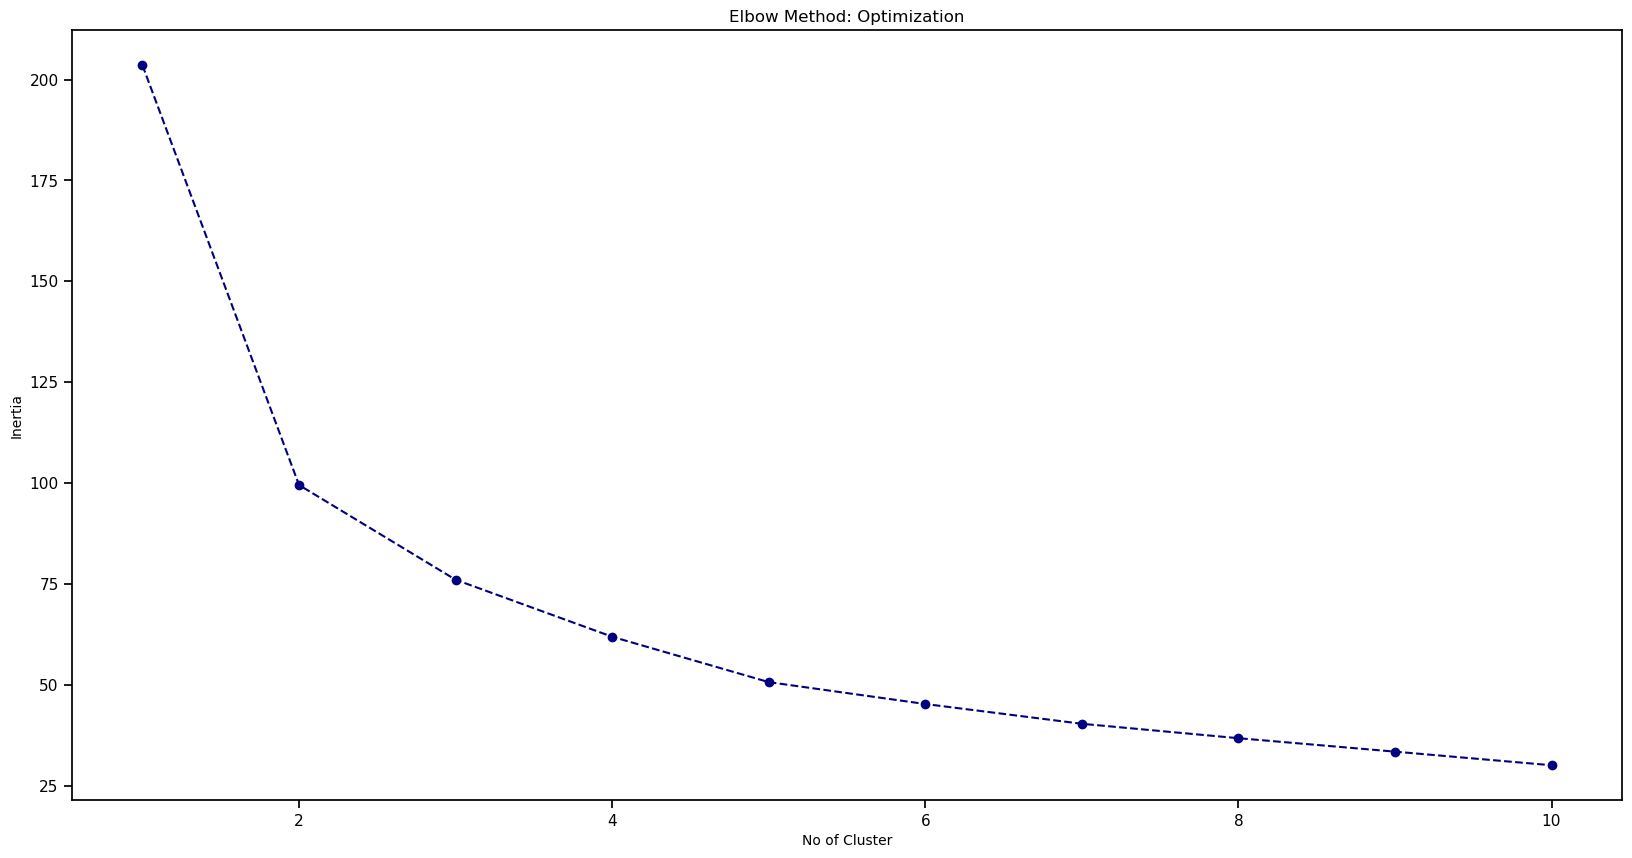

In [38]:
plt.figure(figsize=(20,10))

plt.plot(range(1,11), inertia, marker='o',linestyle='--', color='navy')
plt.title("Elbow Method: Optimization")
plt.xlabel("No of Cluster",fontsize=10)
plt.ylabel("Inertia",fontsize=10)
plt.show()

By the above plot, we can see that there is a kink at k=2.

Hence k=2 can be considered a good number of the cluster to cluster this data.

However, we have seen that I have achieved a weak classification accuracy of 1% with k=2.

# Alternate and more efficient method for running and testing multiple DT with more n_clusters

In [55]:
def evaluate_kmeans_accuracy(X_scaled, y, max_clusters=6):
    best_accuracy = 0
    best_n_clusters = 0
    
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_scaled)
        labels = kmeans.labels_
        
        # Calculating accuracy
        correct_labels = sum(y == labels)
        accuracy = correct_labels / float(y.size)
        
        # Results for cluster value
        print("n_clusters = %d:" % n_clusters)
        print("   Result: %d out of %d labeled correct." % (correct_labels, y.size))
        print("   Accuracy score: {0:0.2f}\n".format(accuracy))
        
        # Choosing the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_clusters = n_clusters

    # Best model
    print("--------x--------\n\nThe best performer is n_clusters = %d with an accuracy of {0:0.2f}".format(best_accuracy) % best_n_clusters)

In [56]:
evaluate_kmeans_accuracy(x_scaled, y, max_clusters=5)

n_clusters = 1:
   Result: 63 out of 7050 labeled correct.
   Accuracy score: 0.01

n_clusters = 2:
   Result: 275 out of 7050 labeled correct.
   Accuracy score: 0.04

n_clusters = 3:
   Result: 118 out of 7050 labeled correct.
   Accuracy score: 0.02

n_clusters = 4:
   Result: 980 out of 7050 labeled correct.
   Accuracy score: 0.14

n_clusters = 5:
   Result: 188 out of 7050 labeled correct.
   Accuracy score: 0.03

--------x--------

The best performer is n_clusters = 4 with an accuracy of 0.14


# Conclusion

- n_clusters[range 2-6] have been giving an approximate accuracy score of 0.1
- We notice that the model has very high inertia of (237.7572) which is not good for our model.
- Although using the Elbow Curve method, we find k=2 to be the best value, we achieved a weak classification accuracy of 0.04 with k=2 on      our model.
- Having then changed the value of k=4, we find relatively higher classification accuracy of 0.14
- Hence, we can conclude that k=4 is the most optimal number of clusters.
- We also conclude that this is not a good model fit for this data.